In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [5]:
dataset = pd.read_csv("https://raw.githubusercontent.com/PoojaaGuru/ML_getting_started/master/train.csv")

In [6]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
for fn in dataset.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(dataset[fn])))

User uploaded file "PassengerId" with length 891 bytes
User uploaded file "Survived" with length 891 bytes
User uploaded file "Pclass" with length 891 bytes
User uploaded file "Name" with length 891 bytes
User uploaded file "Sex" with length 891 bytes
User uploaded file "Age" with length 891 bytes
User uploaded file "SibSp" with length 891 bytes
User uploaded file "Parch" with length 891 bytes
User uploaded file "Ticket" with length 891 bytes
User uploaded file "Fare" with length 891 bytes
User uploaded file "Cabin" with length 891 bytes
User uploaded file "Embarked" with length 891 bytes


Percentage of Class 1 that survived: 63.0 %
Percentage of Class 2 that survived: 47.0 %
Percentage of Class 3 that survived: 24.0 %


,1,2,3
Survived,136,87,119
Died,80,97,372


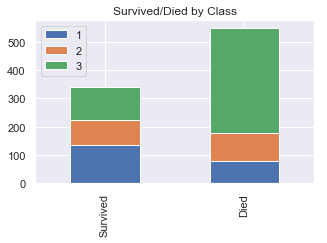

In [7]:
# 1) DATA EXPLORATION & VISUALIZATION (3 CATEGORIES)
#categorising the people who died on the basis of the class
#it is a magic function in ipython your matplotlib graphs will be included in your notebook, next to the code
%matplotlib inline 
import seaborn
seaborn.set() 

survived_class = dataset[dataset['Survived']==1]['Pclass'].value_counts()  #value_counts() returns count of unique values in a column
dead_class = dataset[dataset['Survived']==0]['Pclass'].value_counts()

#plotting 
df_class = pd.DataFrame([survived_class,dead_class])
df_class.index = ['Survived','Died']
df_class.plot(kind='bar',stacked=True, figsize=(5,3), title="Survived/Died by Class")  #width, height in inches figsize()

#finding % survival class wise
Class1_survived= df_class.iloc[0,0]/df_class.iloc[:,0].sum()*100
Class2_survived = df_class.iloc[0,1]/df_class.iloc[:,1].sum()*100
Class3_survived = df_class.iloc[0,2]/df_class.iloc[:,2].sum()*100
print("Percentage of Class 1 that survived:" ,round(Class1_survived),"%")
print("Percentage of Class 2 that survived:" ,round(Class2_survived), "%")
print("Percentage of Class 3 that survived:" ,round(Class3_survived), "%")

#display as table
from IPython.display import display
display(df_class)

Percentage of female that survived: 74.0 %
Percentage of male that survived: 19.0 %


,female,male
Survived,233,109
Died,81,468


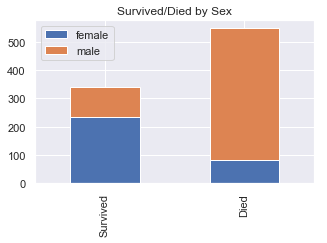

In [8]:
#categorising survival based on sex
Survived = dataset[dataset.Survived == 1]['Sex'].value_counts()
Died = dataset[dataset.Survived == 0]['Sex'].value_counts()
df_sex = pd.DataFrame([Survived , Died])
df_sex.index = ['Survived','Died']
df_sex.plot(kind='bar',stacked=True, figsize=(5,3), title="Survived/Died by Sex")


female_survived= df_sex.female[0]/df_sex.female.sum()*100
male_survived = df_sex.male[0]/df_sex.male.sum()*100
print("Percentage of female that survived:" ,round(female_survived), "%")
print("Percentage of male that survived:" ,round(male_survived), "%")

# display table
from IPython.display import display
display(df_sex) 

Percentage of Embark S that survived: 34.0 %
Percentage of Embark C that survived: 55.0 %
Percentage of Embark Q that survived: 39.0 %


,S,C,Q
Survived,217,93,30
Died,427,75,47


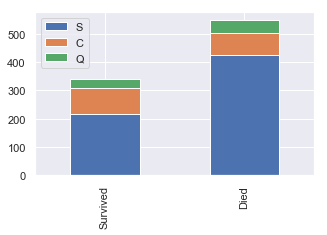

In [9]:
#categorising survival based on embarked
survived_embark = dataset[dataset['Survived']==1]['Embarked'].value_counts()
dead_embark = dataset[dataset['Survived']==0]['Embarked'].value_counts()
df_embark = pd.DataFrame([survived_embark,dead_embark])
df_embark.index = ['Survived','Died']
df_embark.plot(kind='bar',stacked=True, figsize=(5,3))

Embark_S= df_embark.iloc[0,0]/df_embark.iloc[:,0].sum()*100
Embark_C = df_embark.iloc[0,1]/df_embark.iloc[:,1].sum()*100
Embark_Q = df_embark.iloc[0,2]/df_embark.iloc[:,2].sum()*100
print("Percentage of Embark S that survived:", round(Embark_S), "%")
print("Percentage of Embark C that survived:" ,round(Embark_C), "%")
print("Percentage of Embark Q that survived:" ,round(Embark_Q), "%")

from IPython.display import display
display(df_embark)

In [10]:
# 2) DATA CLEANIG, FEATURE SELECTION  (PREPROCESSING)
#inorder to estimate the survival P-class, sex, age, embark has relationship therefore all other columns are dropped except name
#axis=0 along the rows (namely, index in pandas), and axis=1 along the columns. 
X = dataset.drop(['PassengerId','Cabin','Ticket','Fare', 'Parch', 'SibSp'], axis=1)
y = X.Survived                       # vector of labels (dependent variable)
X=X.drop(['Survived'], axis=1)       # remove the dependent variable from the dataframe X

X.head(20)

,Pclass,Name,Sex,Age,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C
2,3,"Heikkinen, Miss. Laina",female,26.0,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S
4,3,"Allen, Mr. William Henry",male,35.0,S
5,3,"Moran, Mr. James",male,NaN,Q
6,1,"McCarthy, Mr. Timothy J",male,54.0,S
7,3,"Palsson, Master. Gosta Leonard",male,2.0,S
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,S
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,C


In [11]:
# sex and embarked have string valuees that has to be converted to numeric values
#For the "Sex" feature we can use the LabelEncoder class from sklearn.preprocessing library.
#get_dummies from pandas will be used to encode the "Embarked" feature
#"Embarked" has two NaN values

#we will provide the 'S' category because it is the most frequent in the data. 
#After this, it is then possible to use the get_dummies and get three new columns (Embarked_C, Embarked_Q, Embarked_S) 
#which are called dummy variables (they assign ‘0’ and ‘1’ to indicate membership in a category). 
#The previous "Embarked" can be dropped from X as it will not be needed anymore and we can now concatenate the X dataframe with the new "Embarked" which has the three dummy variables.

# ----------------- Encoding categorical data -------------------------

# encode "Sex"
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
X.Sex=labelEncoder_X.fit_transform(X.Sex)          #Fit to data, then transform it.

# encode "Embarked"

# number of null values in embarked:
print ('Number of null values in Embarked:', sum(X.Embarked.isnull()))

# fill the two values with one of the options (S, C or Q)
row_index = X.Embarked.isnull()
X.loc[row_index,'Embarked']='S' 

Embarked  = pd.get_dummies(  X.Embarked , prefix='Embarked'  )
X = X.drop(['Embarked'], axis=1)
X= pd.concat([X, Embarked], axis=1)  
# we should drop one of the columns
X = X.drop(['Embarked_S'], axis=1)  # v can find S value using C & Q itself if C =0, Q =0 then S =1

X.head()



Number of null values in Embarked: 2


,Pclass,Name,Sex,Age,Embarked_C,Embarked_Q
0,3,"Braund, Mr. Owen Harris",1,22.0,0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,0,0
4,3,"Allen, Mr. William Henry",1,35.0,0,0


Number of null values in Age: 177


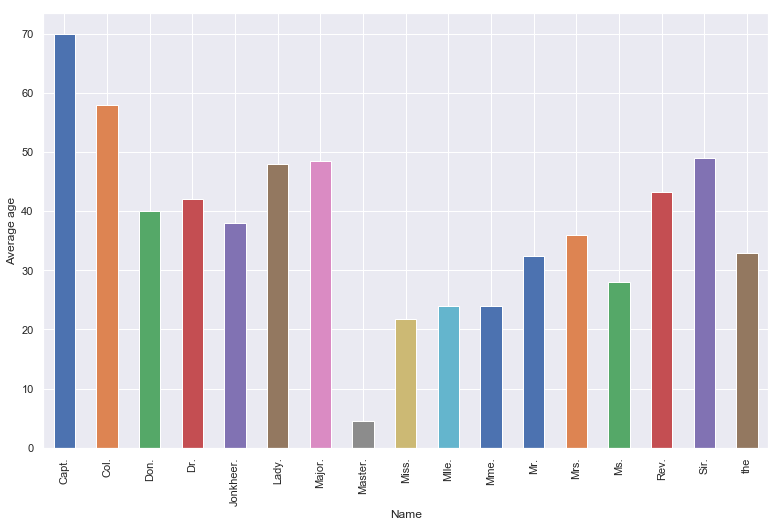

In [13]:
# age has many missing values, if v eliminate them v wont have sufficient data for anlysis
# v can find average age based on the title mr, mrs.. given in the Name column

#-------------- Taking care of missing data  -----------------------------

print ('Number of null values in Age:', sum(X.Age.isnull()))
 
    
got= dataset.Name.str.split(',').str[1]                  #str.split() is function that splits the string into an array str ;str[1] contains mr/mrs
X.iloc[:,1]=pd.DataFrame(got).Name.str.split('\s+').str[1]  #X.iloc[:,1] second column of data frame ie name will contain only the title now
                                                            #str.split('\s+') will split str[1] based on one or more whitespaces

    
#subplot() function can be called to plot two or more plots in one figure. 
#plt.subplot() is a function that returns a tuple containing a figure and axes object(s)
ax = plt.subplot()
ax.set_ylabel('Average age')

#plotting age and title 
X.groupby('Name').mean()['Age'].plot(kind='bar',figsize=(13,8), ax = ax)


title_mean_age=[]
title_mean_age.append(list(set(X.Name)))  #set for unique values of the title, and transform into list
title_mean_age.append(X.groupby('Name').Age.mean())
title_mean_age

#------------------ Fill the missing Ages ---------------------------
n_traning= dataset.shape[0]   #number of rows
n_titles= len(title_mean_age[1])
for i in range(0, n_traning):
    if np.isnan(X.Age[i])==True:
        for j in range(0, n_titles):
            if X.Name[i] == title_mean_age[0][j]:
                X.Age[i] = title_mean_age[1][j]
#--------------------------------------------------------------------    

X=X.drop(['Name'], axis=1)



In [14]:
#We can also make feature transformation. For example, we could transform the "Age" feature in order to simplify it. 
#We could distinguish the youngsters (age less than 18 years) from the adults.

for i in range(0, n_traning):
    if X.Age[i] > 18:
        X.Age[i]= 0
    else:
        X.Age[i]= 1

X.head()

,Pclass,Sex,Age,Embarked_C,Embarked_Q
0,3,1,0.0,0,0
1,1,0,0.0,1,0
2,3,0,0.0,0,0
3,1,0,0.0,0,0
4,3,1,0.0,0,0


In [15]:
#3) APPLYING DIFFERENT CLASSIFIERS
#Having the data preprocessed 
#we can now provide the data to different classifiers and see which one performs better in creating a model of classification for this data.

#We will use cross validation, which is a model validation technique to evaluate how well a model will generalize to an independent data set.
#Python has the cross_val_score class from sklearn.model_selection library to perform cross validation

#-----------------------Logistic Regression---------------------------------------------
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2',random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("Logistic Regression:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")

#-----------------------------------K-NN --------------------------------------------------

# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)


# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("K-NN:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")


#---------------------------------------SVM -------------------------------------------------

# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("SVM:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")

#---------------------------------Naive Bayes-------------------------------------------

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("Naive Bayes:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")

#----------------------------Random Forest------------------------------------------

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("Random Forest:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std())


Logistic Regression:
 Accuracy: 0.7788956985586198 +/- 0.02301002038118436 

K-NN:
 Accuracy: 0.7968615934627171 +/- 0.030251909517970528 

SVM:
 Accuracy: 0.7866981613891726 +/- 0.028360961436535385 

Naive Bayes:
 Accuracy: 0.7700070934059698 +/- 0.01971680800274141 



C:\Users\POOJA\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Random Forest:
 Accuracy: 0.8103447395301326 +/- 0.030148160857141507
